In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
#this is the description of the bandits
#this will give the success probability associated with each of the arm
action = 5                                  #this is the number of actions that are possible
bandit = [0.5, 0.9 , 0.7 , 0.4 , 0.90]       #success probability associated with each bandit

reward_success = [1 , 1, 1 ,1 ,1]
reward_fail = [0 , 0 , 0 , 0 , 0]

#the problem is to choose the best arm
#according to the current probability distribution of the reward

In [3]:
exploration_epsilon = 0.2
number_of_episodes = 20000                         #number of episodes to run
selected = [0 for _ in range(action)]              #this will tell the number of times the arm is selected

In [4]:
Q = [0 for _ in range(action)]              #this will store the q value for each action
                                            #this will give the expected re

In [5]:
def bandit_solution (total):
    r = random.random()            #this is to decide either to explore or to exploit
    #this is to explore. i.e. randomly choose any action and then accumulate the reward
    if (r < exploration_epsilon):
        a = random.randint(0 , 4)
        p_success = random.random()
        if (p_success < bandit[a]):               #it is successful, get the positive reward
            selected[a] += 1               #increment the selected
            k = selected[a]
            Q[a] = Q[a] + (1/(k+1)) * (reward_success[a] - Q[a])      #update the value of q
            reward = reward_success[a]
        else:
            selected[a] += 1
            k = selected[a]
            #total += reward_fail[a]
            Q[a] = Q[a] + (1/(k+1)) * (reward_fail[a] - Q[a])
            reward = reward_fail[a]
            
    else:
        a = np.argmax (Q)
        p_success = random.random()
        if (p_success < bandit[a]):               #it is successful, get the positive reward
            selected[a] += 1               #increment the selected
            k = selected[a]
            Q[a] = Q[a] + (1/(k+1)) * (reward_success[a] - Q[a])      #update the value of q
            reward = reward_success[a]
        else:
            selected[a] += 1
            k = selected[a]
            Q[a] = Q[a] + (1/(k+1)) * (reward_fail[a] - Q[a])
            reward = reward_fail[a]
        
        
    probability = [0 for _ in range(action)]
    for i in range(action):
        probability[i] = exploration_epsilon/action
    a = np.argmax(Q)
    probability[a] += 1-exploration_epsilon
    
    return (reward + total, probability)

In [6]:
total = 0
proportion = np.ones ((0 , action))
probable = np.zeros ((0 , action))
for itr in range(1, number_of_episodes+1):
    
    total , probability = bandit_solution(total)
    proportion = np.vstack((proportion , np.array(selected)/itr ))
    probable = np.vstack((probable , np.array(probability) ))

In [7]:
print (Q)

[0.4863184079601989, 0.901063701196664, 0.7160048134777376, 0.367396593673966, 0.9001996007984028]


Text(0,0.5,'Proportion')

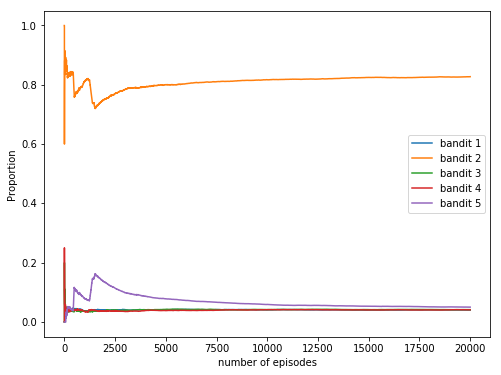

In [8]:
#plot for the proportion
bandit_name = ["bandit 1" , "bandit 2" , "bandit 3" , "bandit 4" , "bandit 5"]
plt.figure (figsize=(8 , 6))
for i , name  in zip (range(action) , bandit_name):
    plt.plot (range(number_of_episodes) , proportion[: , i] , label = name)
    
plt.legend()
plt.xlabel ("number of episodes")
plt.ylabel ("Proportion")

Text(0,0.5,'Probability of selection')

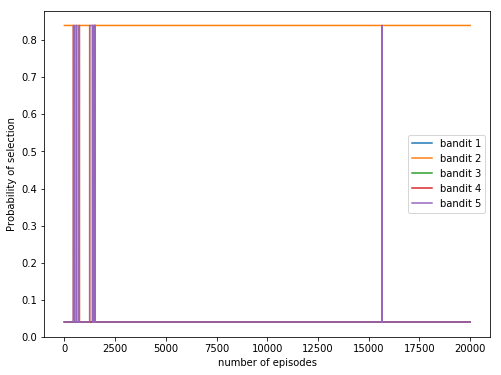

In [9]:
#plot for the proportion
bandit_name = ["bandit 1" , "bandit 2" , "bandit 3" , "bandit 4" , "bandit 5"]
plt.figure (figsize=(8 , 6))
for i , name  in zip (range(action) , bandit_name):
    plt.plot (range(number_of_episodes) , probable[: , i] , label = name)
    
plt.legend()
plt.xlabel ("number of episodes")
plt.ylabel ("Probability of selection")